In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib.ticker import FuncFormatter

In [2]:
def nuss_style_fun(fig, ax, title, author_line=True):
    
    #remove top and right frame parts
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # set left and bottom axis to grey
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    
    # set ticks to grey
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')
    
    #set labels to grey
    ax.yaxis.label.set_color('grey')
    ax.xaxis.label.set_color('grey') 
    
    # align axis labels with axis ends
    ax.set_xlabel(xlabel=None,
                  position=[0, 0],
                  horizontalalignment='left',
                  color='grey',
                  size=14)
    ax.set_ylabel(ylabel=None,
                  position=[0, 1],
                  horizontalalignment='right',
                  color='grey',
                  size=14)
    
    #align title
    ax.set_title(label=title,
                 loc='left',
                 color=(0.41, 0.41, 0.41),
                 size=20)
    
    #author line
    if author_line:
        fig.text(0.99, 0.01, '@rikunert', color='lightgrey', style='italic',
             horizontalalignment='right')
    
    return fig, ax

In [3]:
def draw_cases(x, y, color, title, label=None, xlabel='Date', ylabel='Cases', text1_y=12, text2_y=12):
    
    fig, ax = plt.subplots(figsize=[10.67, 5.33])
    sns.lineplot(x=x,
                 y=y,
                 marker='o',
                 linewidth=1,
                 color=color,
                 label=label,
                 ax=ax)
    fig, ax = nuss_style_fun(fig, ax, title=title)
    ax.set(xlabel='Date',
           ylabel=ylabel)
    ax.xaxis.set_ticks(np.arange(start=x.min(), 
                                 stop=max(x.max(), datetime.strptime('2020-04-19', '%Y-%m-%d')), 
                                 step=timedelta(days=14)))

    if True:
        ax.text(x='2020-03-16',
            y=text1_y,
            s='Soft lockdown',
            horizontalalignment='right',
            verticalalignment='top',
            rotation='vertical',
            color='orange',
            size=14)
        ax.axvline('2020-03-16', linestyle='--', color='orange', linewidth=1)

        ax.text(x='2020-04-19',
            y=text2_y,
            s='Lockdown eased?',
            horizontalalignment='right',
            verticalalignment='top',
            rotation='vertical',
            color='orange',
            size=14)
        ax.axvline('2020-04-19', linestyle='--', color='orange', linewidth=1)
    
    return fig, ax

In [4]:
ecdc_data_url = r'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'

df = pd.read_csv(ecdc_data_url, parse_dates=['dateRep'], dayfirst=True)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-14,14,4,2020,58,3,Afghanistan,AF,AFG,37172386.0
1,2020-04-13,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0
2,2020-04-12,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0
3,2020-04-11,11,4,2020,37,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-10,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0


In [5]:
df['countriesAndTerritories'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czechia', 'Democratic_Republic_of_the_Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican_Republic', 'Ecuador',
       'Egypt', 'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',


In [6]:
country_of_interest = 'Germany'
# country_of_interest =  'United_Kingdom'
# country_of_interest = 'United_States_of_America'
# country_of_interest = 'Sweden'

minimal_number_of_cases = 10
mask_country = df['countriesAndTerritories'] == country_of_interest
mask_dates = df.index <= df[mask_country].index[df.loc[mask_country, 'cases'] >= minimal_number_of_cases].max()
mask = mask_country & mask_dates
df.loc[mask, :].head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
3823,2020-04-14,14,4,2020,2082,170,Germany,DE,DEU,82927922.0
3824,2020-04-13,13,4,2020,2537,126,Germany,DE,DEU,82927922.0
3825,2020-04-12,12,4,2020,2821,129,Germany,DE,DEU,82927922.0
3826,2020-04-11,11,4,2020,4133,171,Germany,DE,DEU,82927922.0
3827,2020-04-10,10,4,2020,5323,266,Germany,DE,DEU,82927922.0
3828,2020-04-09,9,4,2020,4974,246,Germany,DE,DEU,82927922.0
3829,2020-04-08,8,4,2020,4003,254,Germany,DE,DEU,82927922.0
3830,2020-04-07,7,4,2020,3834,173,Germany,DE,DEU,82927922.0
3831,2020-04-06,6,4,2020,3677,92,Germany,DE,DEU,82927922.0
3832,2020-04-05,5,4,2020,5936,184,Germany,DE,DEU,82927922.0


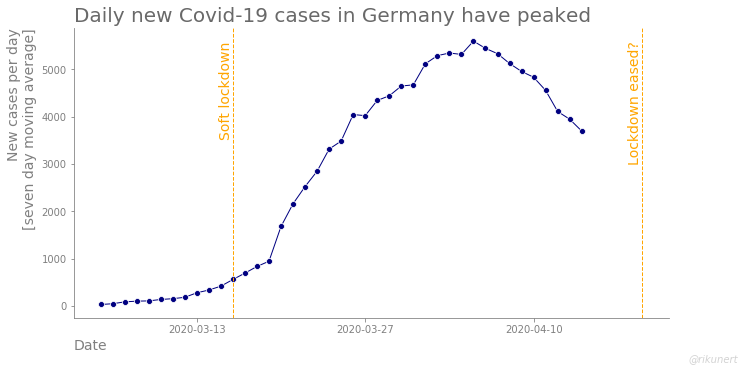

In [7]:
fig, ax = draw_cases(x=df.loc[mask, 'dateRep'], 
                     y=df.iloc[::-1].loc[mask, 'cases'].rolling(window=7).mean(), 
                     color='navy', 
                     title='Daily new Covid-19 cases in Germany have peaked',
                     ylabel='New cases per day\n[seven day moving average]', 
                     text1_y=df.iloc[::-1].loc[mask, 'cases'].rolling(window=7).mean().max(), 
                     text2_y=df.iloc[::-1].loc[mask, 'cases'].rolling(window=7).mean().max())
#fig.savefig('D_new_cases.png', dpi=400, bbox_inches='tight')

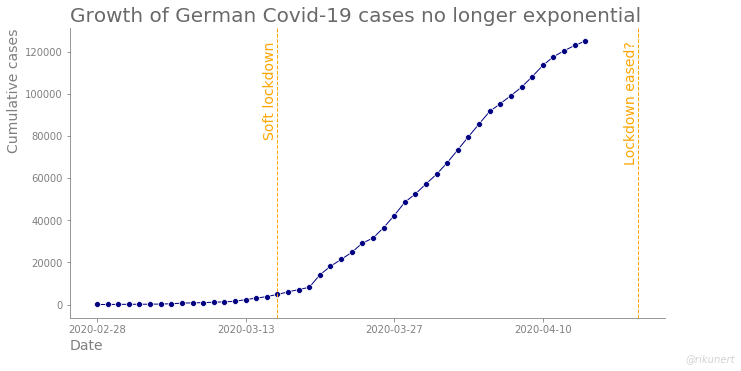

In [8]:
fig, ax = draw_cases(x=df.loc[mask, 'dateRep'], 
                     y=df.iloc[::-1].loc[mask, 'cases'].cumsum(), 
                     color='navy', 
                     title='Growth of German Covid-19 cases no longer exponential',
                     ylabel='Cumulative cases', 
                     text1_y=df.iloc[::-1].loc[mask, 'cases'].cumsum().max(), 
                     text2_y=df.iloc[::-1].loc[mask, 'cases'].cumsum().max())
#fig.savefig('D_cum_cases.png', dpi=400, bbox_inches='tight')

In [9]:
series_cum_cases = df.iloc[::-1].loc[mask, 'cases'].cumsum()
idx_half_cum_cases = [series_cum_cases[series_cum_cases < case_load/2].index.min() for case_load in series_cum_cases]
date_less_than_half_cases = df.loc[idx_half_cum_cases, 'dateRep']
date_less_than_half_cases.index = series_cum_cases.index
days_since_less_than_half_cases = (df.iloc[::-1].loc[mask, 'dateRep'] - date_less_than_half_cases) / timedelta(1)  # division to get float dtype

# sanity check
df_san = pd.DataFrame({'dateRep': df.iloc[::-1].loc[mask, 'dateRep'],
                   'cumulative cases': series_cum_cases,
                    'half cumulative cases': series_cum_cases/2,
                    'date less than half cases': date_less_than_half_cases,
                   'days since less than half cases': days_since_less_than_half_cases})
df_san.tail(10)

C:\Users\Richard\Anaconda3\lib\site-packages\pandas\core\indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


,dateRep,cumulative cases,half cumulative cases,date less than half cases,days since less than half cases
3832,2020-04-05,91693,45846.5,2020-03-27,9.0
3831,2020-04-06,95370,47685.0,2020-03-27,10.0
3830,2020-04-07,99204,49602.0,2020-03-28,10.0
3829,2020-04-08,103207,51603.5,2020-03-28,11.0
3828,2020-04-09,108181,54090.5,2020-03-29,11.0
3827,2020-04-10,113504,56752.0,2020-03-29,12.0
3826,2020-04-11,117637,58818.5,2020-03-30,12.0
3825,2020-04-12,120458,60229.0,2020-03-30,13.0
3824,2020-04-13,122995,61497.5,2020-03-30,14.0
3823,2020-04-14,125077,62538.5,2020-03-31,14.0


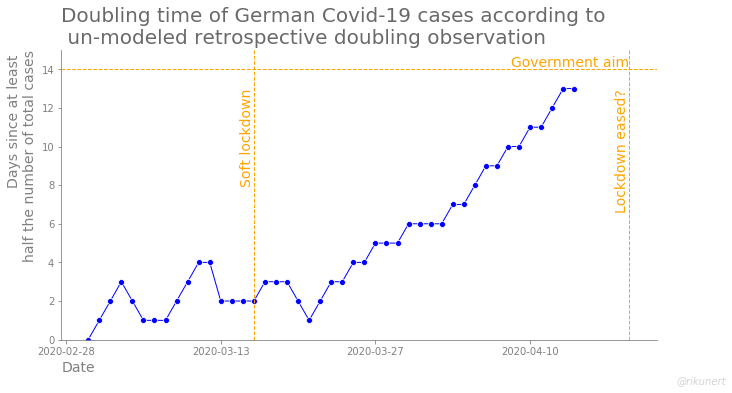

In [10]:
fig, ax = draw_cases(x=df.loc[mask, 'dateRep'], 
                     y=days_since_less_than_half_cases-1, 
                     color='blue', 
                     title='Doubling time of German Covid-19 cases according to\n un-modeled retrospective doubling observation',
                     ylabel='Days since at least \nhalf the number of total cases', 
                     text1_y=(days_since_less_than_half_cases-1).max(), 
                     text2_y=(days_since_less_than_half_cases-1).max())
ax.set(ylim=[0, 15])
ax.text(x='2020-04-19',
       y=14,
       s='Government aim',
        horizontalalignment='right',
        verticalalignment='bottom',
        rotation='horizontal',
        color='orange',
       size=14)
ax.axhline(y=14, 
           linestyle='--', color='orange', linewidth=1)
#fig.savefig('D_doubling_retrospective.png', dpi=400, bbox_inches='tight')

In [11]:
series_cum_cases = df.iloc[::-1].loc[mask, 'cases'].cumsum()
series_cases_increase =  df.iloc[::-1].loc[mask, 'cases'] / series_cum_cases.shift(1)
#series_cases_increase = series_cases_increase.shift(-1)

# sanity check
df_san = pd.DataFrame({'dateRep': df.iloc[::-1].loc[mask, 'dateRep'],
                   'cumulative cases': series_cum_cases,
                       'cumulative cases shifted': series_cum_cases.shift(1),
                       'daily new cases': df.iloc[::-1].loc[mask, 'cases'],
                    'series cases increase': series_cases_increase})
df_san.tail()

,dateRep,cumulative cases,cumulative cases shifted,daily new cases,series cases increase
3827,2020-04-10,113504,108181.0,5323,0.049205
3826,2020-04-11,117637,113504.0,4133,0.036413
3825,2020-04-12,120458,117637.0,2821,0.023981
3824,2020-04-13,122995,120458.0,2537,0.021061
3823,2020-04-14,125077,122995.0,2082,0.016928


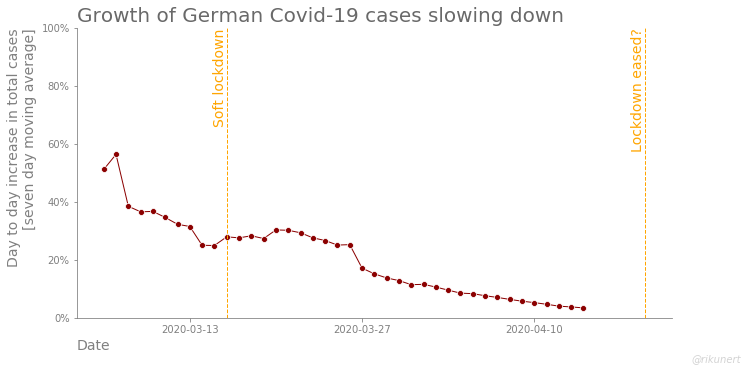

In [12]:
fig, ax = draw_cases(x=df.loc[mask, 'dateRep'], 
                     y=series_cases_increase.rolling(window=7).mean(), 
                     color='darkred', 
                     title='Growth of German Covid-19 cases slowing down',
                     ylabel='Day to day increase in total cases\n[seven day moving average]', 
                     text1_y=min(1, series_cases_increase.max()), 
                     text2_y=min(1, series_cases_increase.max()))
ax.set(ylim=[0, 1])
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

#fig.savefig('D_doubling_prospective.png', dpi=400, bbox_inches='tight')

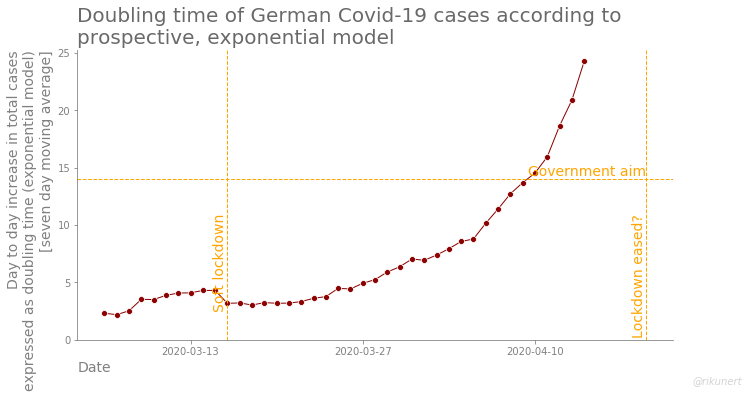

In [13]:
# see https://blog.datawrapper.de/weekly-chart-coronavirus-doublingtimes/
series_cases_increase_days = (1*np.log(2))/(np.log(series_cum_cases/series_cum_cases.shift(1)))

fig, ax = draw_cases(x=df.loc[mask, 'dateRep'], 
                     y=series_cases_increase_days.rolling(window=7).mean(), 
                     color='darkred', 
                     title='Doubling time of German Covid-19 cases according to\nprospective, exponential model',
                     ylabel='Day to day increase in total cases\nexpressed as doubling time (exponential model)\n[seven day moving average]', 
                     text1_y=11, 
                     text2_y=11)
ax.set(ylim=[0, max(15, series_cases_increase_days.rolling(window=7).mean().max() + 1)])
ax.text(x='2020-04-19',
       y=14,
       s='Government aim',
        horizontalalignment='right',
        verticalalignment='bottom',
        rotation='horizontal',
        color='orange',
       size=14)
ax.axhline(y=14, 
           linestyle='--', color='orange', linewidth=1)

#fig.savefig('D_doubling_prospective_days_exponential.png', dpi=400, bbox_inches='tight')

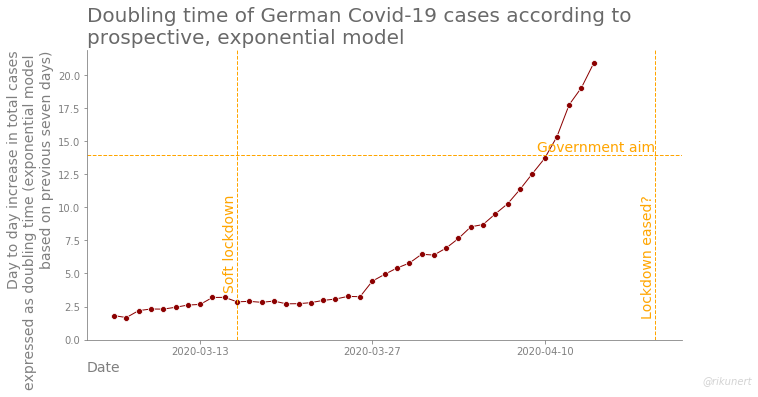

In [14]:
# see https://blog.datawrapper.de/weekly-chart-coronavirus-doublingtimes/
lookback_days = 7
series_cases_increase_days_7d = (lookback_days*np.log(2))/(np.log(series_cum_cases/series_cum_cases.shift(lookback_days)))

fig, ax = draw_cases(x=df.loc[mask, 'dateRep'], 
                     y=series_cases_increase_days_7d, 
                     color='darkred', 
                     title='Doubling time of German Covid-19 cases according to\nprospective, exponential model',
                     ylabel='Day to day increase in total cases\nexpressed as doubling time (exponential model \nbased on previous seven days)', 
                     text1_y=11, 
                     text2_y=11)
ax.set(ylim=[0, max(15, series_cases_increase_days_7d.max() + 1)])
ax.text(x='2020-04-19',
       y=14,
       s='Government aim',
        horizontalalignment='right',
        verticalalignment='bottom',
        rotation='horizontal',
        color='orange',
       size=14)
ax.axhline(y=14, 
           linestyle='--', color='orange', linewidth=1)

#fig.savefig('D_doubling_prospective_days_exponential.png', dpi=400, bbox_inches='tight')

In [15]:
series_cases_increase_days.rolling(window=7).mean().tail()

3827    14.524831
3826    15.947355
3825    18.646384
3824    20.878825
3823    24.265590
Name: cases, dtype: float64

In [16]:
series_cum_cases = df.iloc[::-1].loc[mask, 'cases'].cumsum()
series_doubling_time_linear =  series_cum_cases / df.iloc[::-1].loc[mask, 'cases']

# sanity check
df_san = pd.DataFrame({'dateRep': df.iloc[::-1].loc[mask, 'dateRep'],
                   'cumulative cases': series_cum_cases,
                       'cumulative cases doubled': series_cum_cases*2,
                       'daily new cases': df.iloc[::-1].loc[mask, 'cases'],
                    'days to doubling linear model': series_doubling_time_linear})
df_san.head()

,dateRep,cumulative cases,cumulative cases doubled,daily new cases,days to doubling linear model
3869,2020-02-28,26,52,26,1.000000
3868,2020-02-29,36,72,10,3.600000
3867,2020-03-01,90,180,54,1.666667
3866,2020-03-02,108,216,18,6.000000
3865,2020-03-03,136,272,28,4.857143


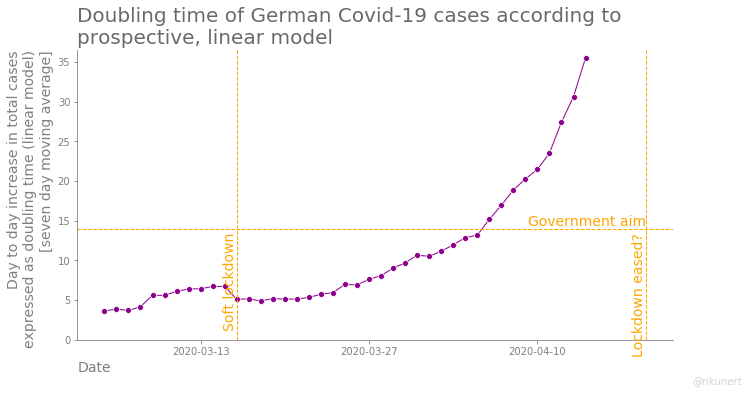

In [17]:
fig, ax = draw_cases(x=df.loc[mask, 'dateRep'], 
                     y=series_doubling_time_linear.rolling(window=7).mean(), 
                     color='darkmagenta', 
                     title='Doubling time of German Covid-19 cases according to\nprospective, linear model',
                     ylabel='Day to day increase in total cases\nexpressed as doubling time (linear model)\n[seven day moving average]', 
                     text1_y=13.5,#series_doubling_time_linear.rolling(window=7).mean().max(), 
                     text2_y=13.5)#series_doubling_time_linear.rolling(window=7).mean().max())
ax.set(ylim=[0, max(15, series_doubling_time_linear.rolling(window=7).mean().max() + 1)])
ax.text(x='2020-04-19',
       y=14,
       s='Government aim',
        horizontalalignment='right',
        verticalalignment='bottom',
        rotation='horizontal',
        color='orange',
       size=14)
ax.axhline(y=14, 
           linestyle='--', color='orange', linewidth=1)

#fig.savefig('D_doubling_prospective_days_linear.png', dpi=400, bbox_inches='tight')

In [18]:
series_doubling_time_linear.rolling(window=7).mean().tail()

3827    21.459114
3826    23.510932
3825    27.404293
3824    30.624805
3823    35.510606
Name: cases, dtype: float64

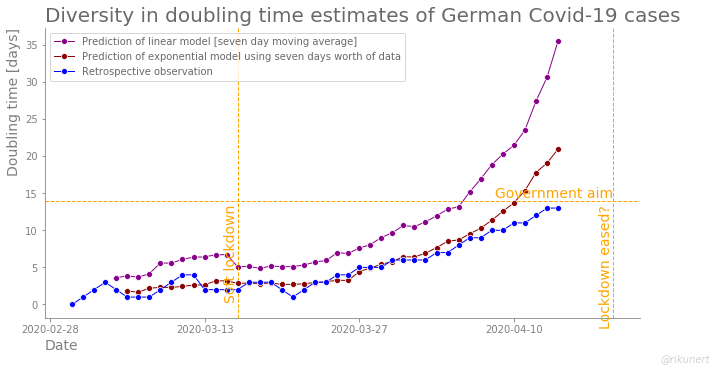

In [19]:
fig, ax = draw_cases(x=df.loc[mask, 'dateRep'], 
                     y=series_doubling_time_linear.rolling(window=7).mean(), 
                     color='darkmagenta', 
                     label='Prediction of linear model [seven day moving average]',
                     title='Diversity in doubling time estimates of German Covid-19 cases',
                     ylabel='Doubling time of total confirmed cases [days]', 
                     text1_y=13.5, 
                     text2_y=13.5)
if True:
    ax.text(x='2020-04-19',
       y=14,
       s='Government aim',
        horizontalalignment='right',
        verticalalignment='bottom',
        rotation='horizontal',
        color='orange',
       size=14)
    ax.axhline(y=14, 
           linestyle='--', color='orange', linewidth=1)

sns.lineplot(x=df.loc[mask, 'dateRep'], 
             y=series_cases_increase_days_7d, 
             marker='o',
             linewidth=1,
             color='darkred',
             label='Prediction of exponential model using seven days worth of data',
             ax=ax)

sns.lineplot(x=df.loc[mask, 'dateRep'], 
             y=days_since_less_than_half_cases-1, 
             marker='o',
             linewidth=1,
             color='blue',
             label='Retrospective observation',
             ax=ax)

ax.set(xlabel='Date',
      ylabel='Doubling time [days]')

ax.legend().get_frame().set_color('white')    
for text in ax.legend().get_texts():
    text.set_color((0.41, 0.41, 0.41))
    
#fig.savefig('SE_doubling_all.png', dpi=400, bbox_inches='tight')

In [20]:
infected = 1
prop_increase = 0.0508
for i in range(14):
    infected = infected + infected * prop_increase
    print(infected)

1.0508
1.10418064
1.160273016512
1.2192148857508096
1.2811510019469508
1.3462334728458558
1.4146221332664253
1.4864849376363596
1.5619983724682867
1.6413478897896756
1.724728362590991
1.8123445634106135
1.9044116672318725
2.0011557799272515


In [21]:
(1*np.log(2))/(np.log(1.05946/1))

12.000606798546773